In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
%matplotlib inline

In [2]:
def cm_plot(cm, y_test, title):
    N = list(map(lambda clazz : sum(y_test == clazz), [*range(5)]))
    plt.figure(figsize=(7,5)) 
    c = plt.pcolormesh([cm[j, :] / N[j] for j in range(5)], vmin=0.0, vmax=1.0)
    plt.title(title)
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.xticks(0.5 + np.arange(5), np.arange(5))
    plt.yticks(0.5 + np.arange(5), np.arange(5))
    c.update_scalarmappable()
    ax = c.axes
    for p, color, value in zip(c.get_paths(), c.get_facecolors(), c.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        ax.text(x, y, "%.2f" % value, ha="center", va="center", color=(0.0, 0.0, 0.0) if sum(color[:2] > 0.3) >= 2 else (1.0, 1.0, 1.0))
#     plt.savefig(title+'.png', bbox_inches='tight', dpi=300)
    return plt.show()

In [3]:
df = pd.read_csv('train.csv').drop(columns=['Id'])
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size=0.2, random_state=42)

In [4]:
# plt.figure(figsize=(10,6)) 
# plt.plot(PCA(n_components = 100).fit(StandardScaler().fit_transform(X_train)).explained_variance_ratio_)
# plt.title("Scree Plot")
# # plt.savefig("ScreePlot.png", dpi=300, bbox_inches='tight')
# plt.show()

scaler = StandardScaler()
pca = PCA(n_components = 20)
X_train_pca = pca.fit_transform(scaler.fit_transform(X_train))
X_test_pca = pca.transform(scaler.transform(X_test))

Random Forest(PCA) Mean Accuracy: 0.8755833333333334


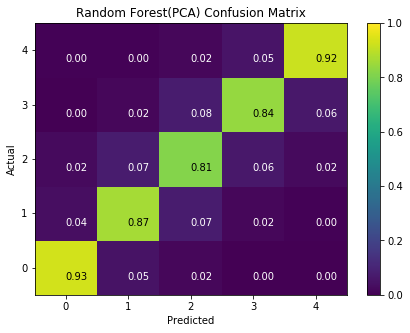

KNN(PCA) Mean Accuracy: 0.8555833333333334


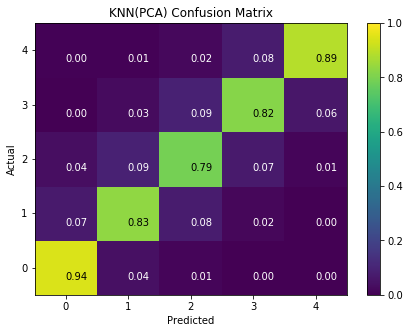

In [6]:
classifiers_pca = {'Random Forest': RandomForestClassifier(n_jobs = -1, random_state=42),
                   'KNN': KNeighborsClassifier(p = 1, n_jobs = -1)}
for name, clf in classifiers_pca.items():
    clf.fit(X_train_pca, y_train)
    print(name + ' Mean Accuracy: ' + str(clf.score(X_test_pca, y_test)))
    cm_plot(confusion_matrix(y_test, clf.predict(X_test_pca)), y_test, name + ' Confusion Matrix')

Mean Accuracy: 0.86525


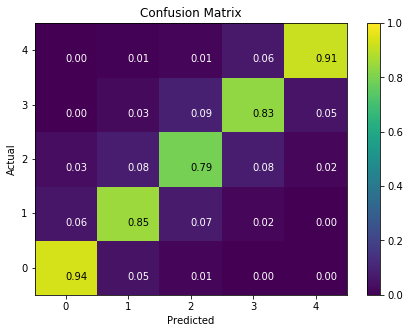

In [7]:
clf = SVC()
clf.fit(X_train_pca, y_train)
print('Mean Accuracy: ' + str(clf.score(X_test_pca, y_test)))
cm_plot(confusion_matrix(y_test, clf.predict(X_test_pca)), y_test, 'Confusion Matrix')

In [ ]:
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'gamma':('auto', 'scale'), 'C':[0.1, 0.5, 1, 5, 10, 25], 'random_state':[42]}

In [ ]:
X = PCA(n_components = 20).fit_transform(StandardScaler().fit_transform(df.iloc[:,1:]))

parameters = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'log2', 0.25, 0.5, 0.75, 1.0],
    'min_samples_split': [2, 4, 6],
}

model = GridSearchCV(RandomForestClassifier(random_state=42), parameters, cv=5, n_jobs = -1, scoring='accuracy').fit(X, df.iloc[:,0])
from pprint import pprint
pprint(model.cv_results_)
print()
pprint(model.best_params_)

In [ ]:
parameters = {
    'weights': ['uniform', 'distance'],
    'n_neighbors': [*range(1,31)],
}